In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [2]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)


Saving Exercise 34.xlsx to Exercise 34.xlsx


In [4]:
df = data.parse('Sheet1')
display(df)

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.00
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.00
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.00
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.00
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.00
...,...,...,...,...,...,...,...
2774,CCNA_03985,5307.1,5483.3,7433.1,8070.4,8948.8,9434.10
2775,CCNA_03998,20734.0,15255.0,10074.0,11813.0,13762.0,9242.80
2776,bpt,60581.0,43327.0,47557.0,46625.0,45906.0,33519.00
2777,nuoK,3692.7,5039.7,7084.0,5946.8,6372.7,12292.00


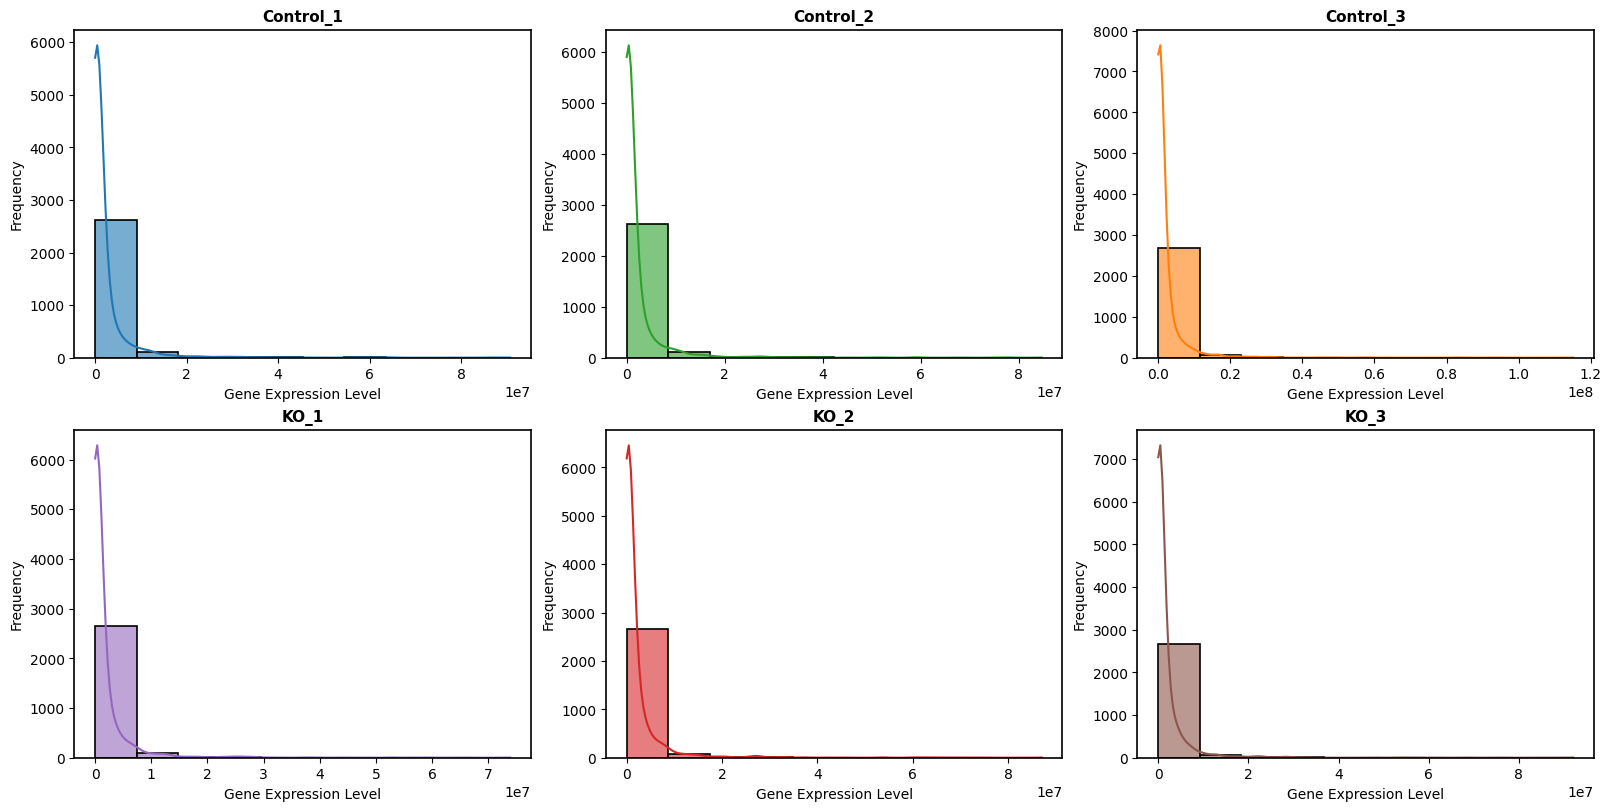

In [11]:
# Define the conditions and colors
conditions = ['Control_1', 'Control_2', 'Control_3','KO_1','KO_2', 'KO_3']
num_conditions = len(conditions)

# Define your custom color palette
# You can use named colors, hex codes, or RGB tuples
colors = [
    '#1f77b4',  # Control_1  (blue)
    '#2ca02c',  # Control_2  (green)
    '#ff7f0e',  # Control_3  (orange)
    '#9467bd',  # KO_1  (purple)
    '#d62728',  # KO_2 (red)
    '#8c564b',  # KO_3 (brown)
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), constrained_layout=True)
axes = axes.flatten()

# Plot each histogram
for i, (col, color) in enumerate(zip(conditions, colors)):
    sns.histplot(df[col], kde=True, bins=10, ax=axes[i], color=color, alpha=0.6, linewidth=1.2)
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Gene Expression Level', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(False)
    for spine in axes[i].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)

# Remove unused subplots (in case fewer conditions than axes)
for j in range(num_conditions, len(axes)):
    fig.delaxes(axes[j])

# Save high-resolution images
png_path = 'Histogram_600dpi.png'
pdf_path = 'Histograml.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()

/tmp/ipython-input-1376765090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y='Gene Expression Level', data=df_melted, palette=colors) # Added palette for different colors


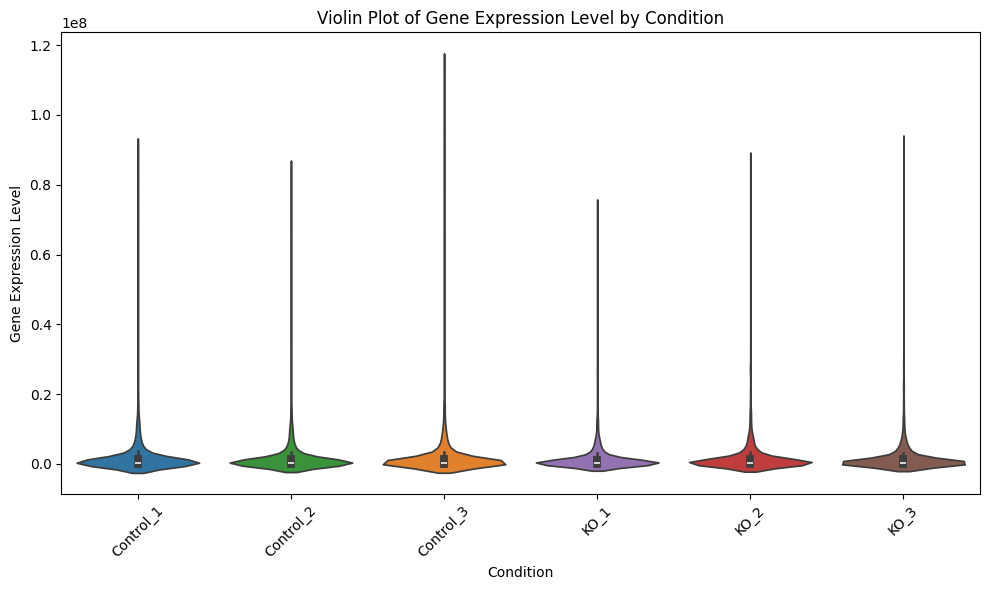

In [15]:
# Melt the dataframe to long format
df_melted = df.melt(id_vars='Gene Name', var_name='Condition', value_name='Gene Expression Level')

# Create violin plot with different colors
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Gene Expression Level', data=df_melted, palette=colors) # Added palette for different colors
plt.title('Violin Plot of Gene Expression Level by Condition')
plt.xlabel('Condition')
plt.ylabel('Gene Expression Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()